# TCRpeg embeddings

In [17]:
import numpy as np
import pandas as pd

In [33]:
# Add autoreload for easier development
# %load_ext autoreload
# %autoreload 2
from tcrpeg_toolkit.embedding_clustering import EmbeddingClustering
from tcrpeg_toolkit.umap_generator import UMAPGenerator
from tcrpeg_toolkit.embedding_handler import EmbeddingHandler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
sample_1 = EmbeddingClustering("results_sample_data/embeddings/structured/sample_1_structured_embeddings.npy")

INFO - Data loaded from results_sample_data/embeddings/structured/sample_1_structured_embeddings.npy


In [44]:
sample_1_clusters = sample_1.run(optimal_cluster=True)

INFO - Finding the optimal number of clusters using the elbow method...
INFO - Based on the rule of thumb, the maximum number of clusters k should be ≤ 31.
INFO - The optimal number of clusters k based on the elbow method is 3.
INFO - Silhouette score: 0.5038906335830688


Sampling a subset of 768 / 2000 for training
Clustering 768 points in 640D to 3 clusters, redo 1 times, 10 iterations
  Preprocessing in 0.00 s
  Iteration 9 (0.01 s, search 0.00 s): objective=5757.43 imbalance=1.397 nsplit=0       


In [45]:
sample_1_clusters_umap = UMAPGenerator(sample_1_clusters)

Loaded Embedding Object


In [46]:
sample_1_clusters_umap.run()

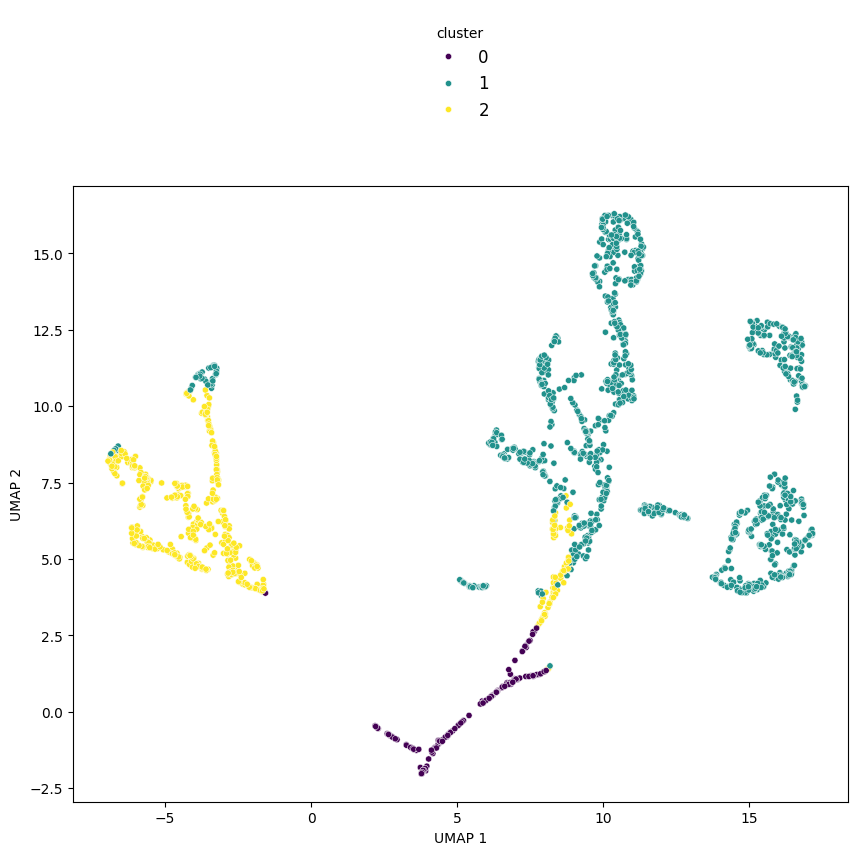

In [47]:
sample_1_clusters_umap.plot_umap(hue='cluster')

## Two samples

In [74]:
sample_1_metadata = pd.read_csv('sample_data/sample_1.csv')
sample_1_metadata['id'] = sample_1_metadata.index

In [75]:
sample_2_metadata = pd.read_csv('sample_data/sample_2.csv')
sample_2_metadata['id'] = sample_2_metadata.index

In [76]:
sample_1_embeddings = EmbeddingHandler("results_sample_data/embeddings/structured/sample_1_structured_embeddings.npy", 
                                       name='sample_1', metadata=sample_1_metadata)
sample_2_embeddings = EmbeddingHandler("results_sample_data/embeddings/structured/sample_2_structured_embeddings.npy", 
                                       name='sample_2', metadata=sample_2_metadata)

INFO - Data loaded from results_sample_data/embeddings/structured/sample_1_structured_embeddings.npy
INFO - Data loaded from results_sample_data/embeddings/structured/sample_2_structured_embeddings.npy


In [77]:
sample_1_embeddings

EmbeddingHandler(embeddings_shape=(2000, 640), ids_shape=(2000,), sequences_shape=(2000,), metadata_shape=(2000, 3), name=sample_1)

In [78]:
sample_2_embeddings

EmbeddingHandler(embeddings_shape=(1983, 640), ids_shape=(1983,), sequences_shape=(1983,), metadata_shape=(1983, 3), name=sample_2)

In [79]:
samples_all_embeddings = sample_1_embeddings + sample_2_embeddings

In [80]:
samples_all_embeddings

EmbeddingHandler(embeddings_shape=(3983, 640), ids_shape=(3983,), sequences_shape=(3983,), metadata_shape=(3983, 5), name=sample_1_sample_2)

In [82]:
samples_all_clusters = EmbeddingClustering(samples_all_embeddings).run()

INFO - Loaded Embedding Object


Sampling a subset of 1024 / 3983 for training
Clustering 1024 points in 640D to 4 clusters, redo 1 times, 10 iterations
  Preprocessing in 0.08 s
  Iteration 9 (0.03 s, search 0.02 s): objective=8424.53 imbalance=1.434 nsplit=0       


INFO - Silhouette score: 0.5817193984985352


In [84]:
samples_all_clusters_umap = UMAPGenerator(samples_all_clusters)

Loaded Embedding Object


In [85]:
samples_all_clusters_umap.run()

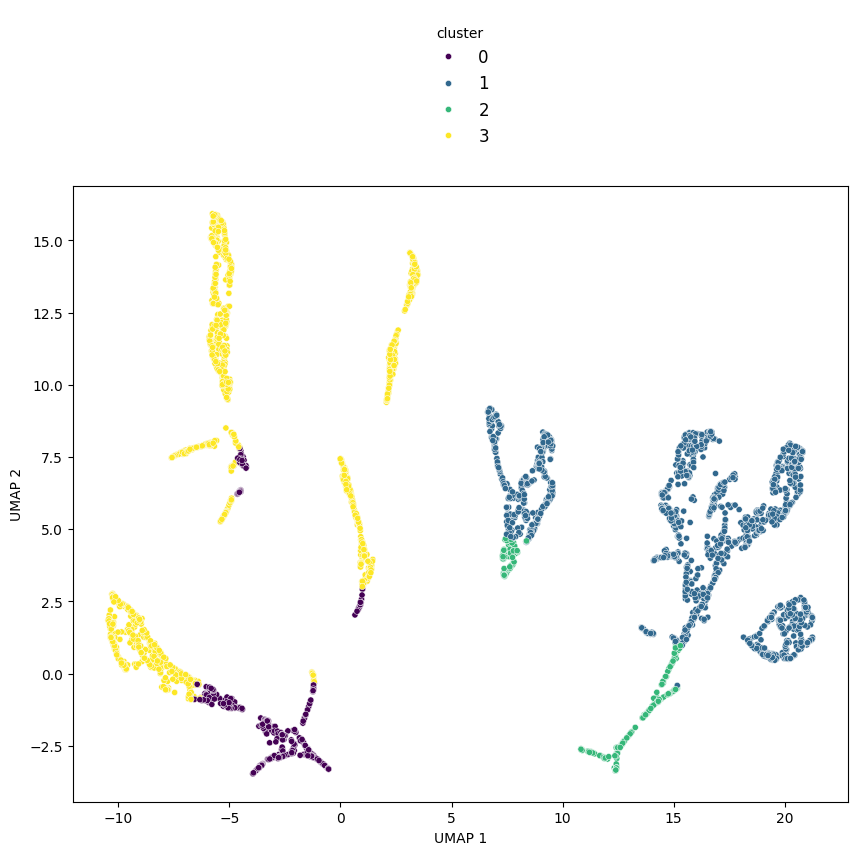

In [87]:
samples_all_clusters_umap.plot_umap(hue='cluster')

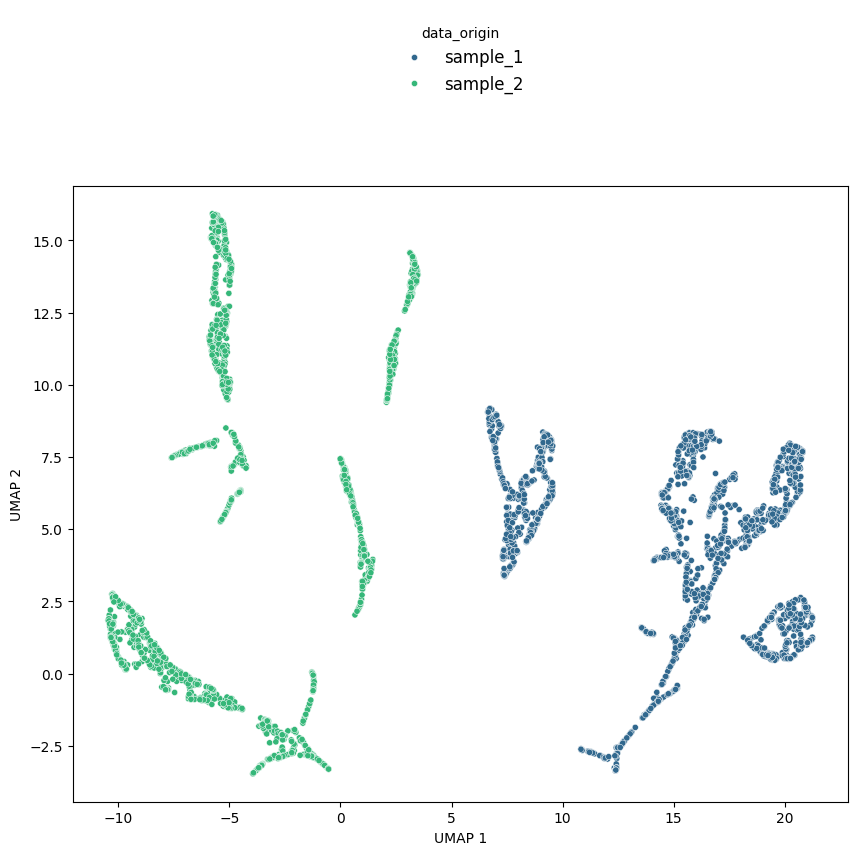

In [88]:
samples_all_clusters_umap.plot_umap(hue='data_origin')

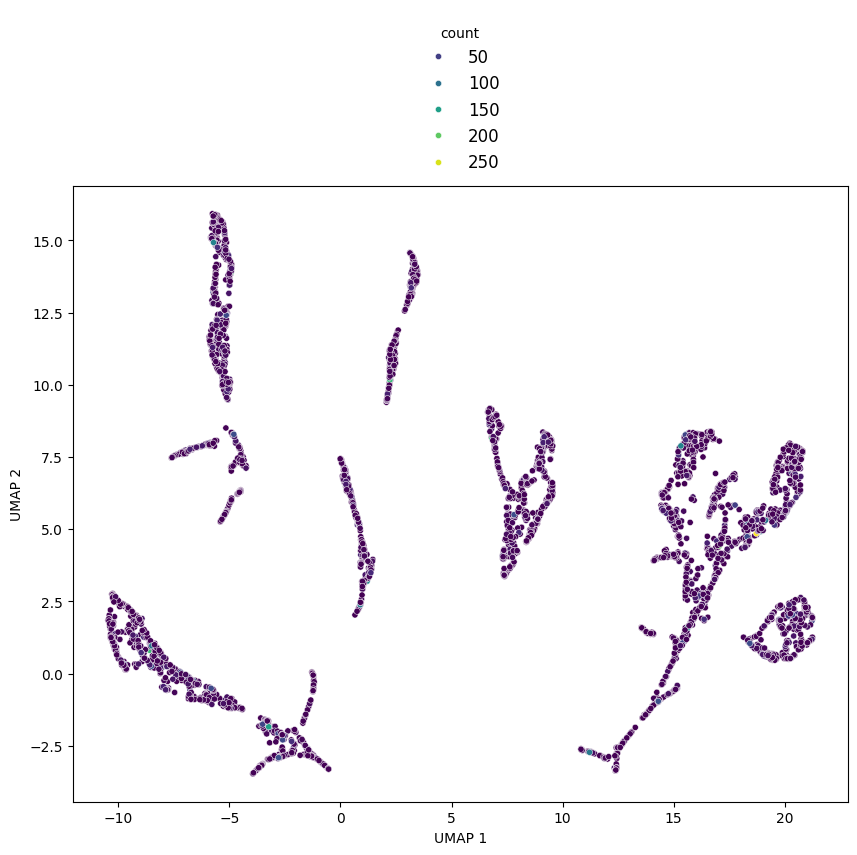

In [89]:
samples_all_clusters_umap.plot_umap(hue='count')